In [14]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
pwd

'C:\\Users\\srika'

In [16]:
df=pd.read_csv("Downloads/Mini project/NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [17]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


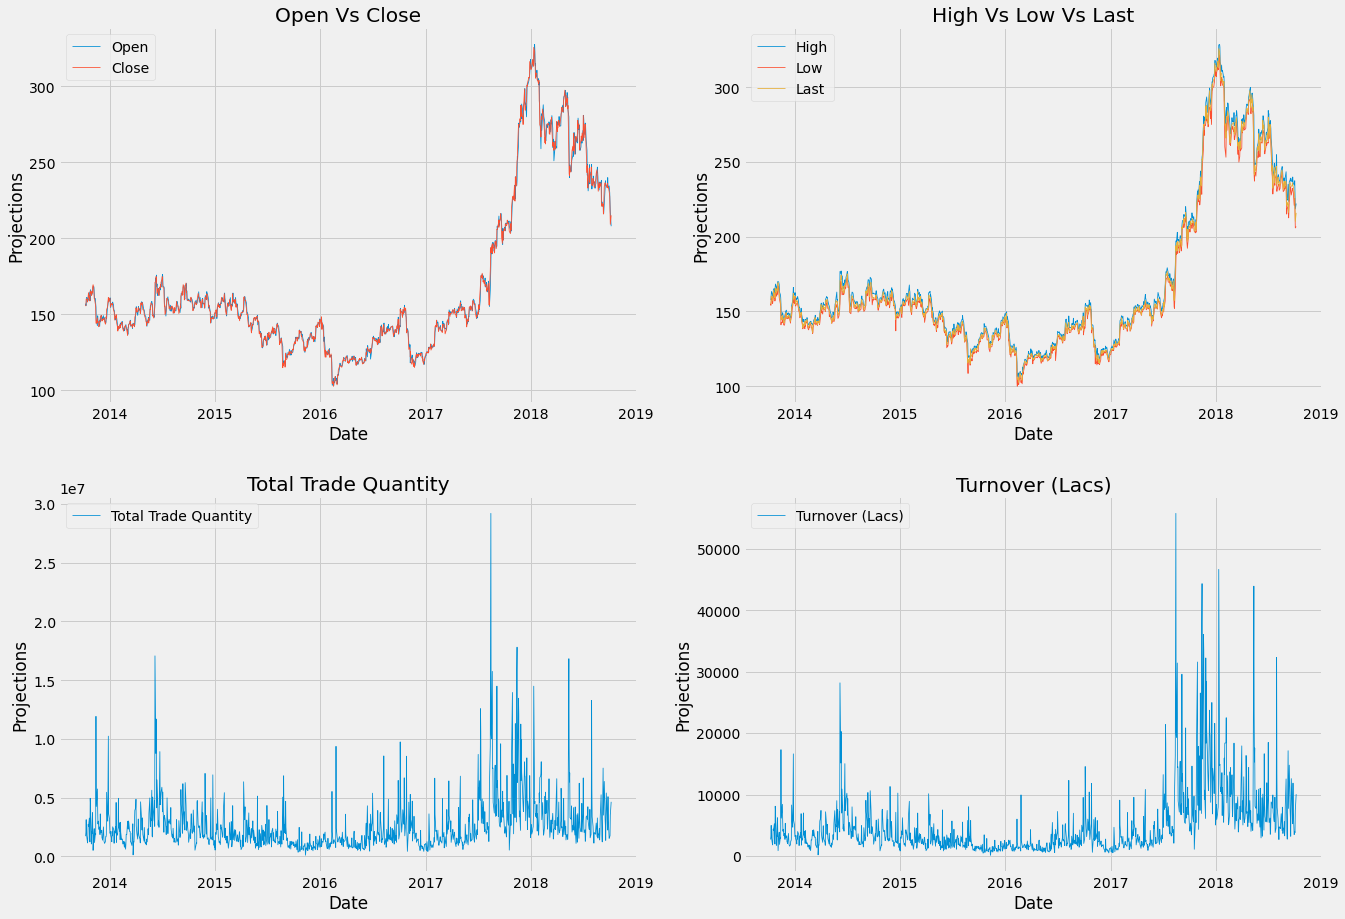

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20, 14), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for Open and Close
axes[0][0].plot(df["Open"],linewidth=0.8)
axes[0][0].plot(df["Close"],linewidth=0.8)
axes[0][0].set_ylabel("Projections")
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('Open Vs Close')
axes[0][0].legend(['Open', 'Close'], loc='upper left')

# Graph for High, Low and Last
axes[0][1].plot(df["High"],linewidth=0.8)
axes[0][1].plot(df["Low"],linewidth=0.8)
axes[0][1].plot(df["Last"],linewidth=0.8)
axes[0][1].set_ylabel("Projections")
axes[0][1].set_xlabel("Date")
axes[0][1].set_title('High Vs Low Vs Last')
axes[0][1].legend(['High', 'Low', 'Last'], loc='upper left')

# Graph for Total Trade Quantity
axes[1][0].plot(df["Total Trade Quantity"],linewidth=0.8)
axes[1][0].set_ylabel("Projections")
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('Total Trade Quantity')
axes[1][0].legend(['Total Trade Quantity'], loc='upper left')

# Graph for Turnover (Lacs)
axes[1][1].plot(df["Turnover (Lacs)"],linewidth=0.8)
axes[1][1].set_ylabel("Projections")
axes[1][1].set_xlabel("Date")
axes[1][1].set_title('Turnover (Lacs)')
axes[1][1].legend(['Turnover (Lacs)'], loc='upper left')

In [19]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
new_dataset.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [20]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis='columns',inplace=True)
final_dataset=new_dataset.values
new_dataset.head()

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


In [21]:
df=new_dataset.reset_index()['Close']
print(df)

0        155.8
1       155.55
2       160.15
3       160.05
4       159.45
         ...  
1230     230.9
1231     227.6
1232     218.2
1233     209.2
1234    215.15
Name: Close, Length: 1235, dtype: object


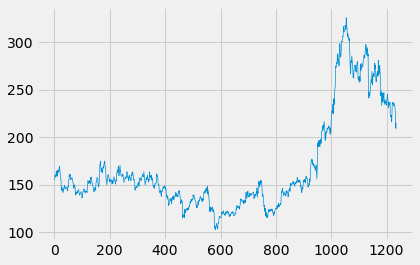

In [22]:
plt.plot(df, linewidth=0.7)

In [23]:
#Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.23823398]
 [0.2371134 ]
 [0.25773196]
 ...
 [0.51792918]
 [0.47758853]
 [0.50425818]]


In [24]:
training_size=int(len(df)*0.65)
testing_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [25]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape)
print(y_train.shape)

(701, 100)
(701,)


In [26]:
print(X_test.shape) 
print(ytest.shape)

(332, 100)
(332,)


In [27]:
print(len(X_train))
print(len(y_train))

701
701


In [28]:
print(len(X_test))
print(len(ytest))

332
332


In [29]:
# reshape input into a 3 dimentional array of the format [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate = 0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(rate = 0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

In [31]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
22/22 [==============================] - 21s 453ms/step - loss: 0.0067 - val_loss: 0.0544
Epoch 2/100
22/22 [==============================] - 6s 296ms/step - loss: 0.0017 - val_loss: 0.0176
Epoch 3/100
22/22 [==============================] - 4s 195ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 4/100
22/22 [==============================] - 4s 189ms/step - loss: 0.0010 - val_loss: 0.0085
Epoch 5/100
22/22 [==============================] - 4s 188ms/step - loss: 9.9628e-04 - val_loss: 0.0060
Epoch 6/100
22/22 [==============================] - 4s 206ms/step - loss: 8.7719e-04 - val_loss: 0.0088
Epoch 7/100
22/22 [==============================] - 5s 219ms/step - loss: 8.5789e-04 - val_loss: 0.0044
Epoch 8/100
22/22 [==============================] - 4s 190ms/step - loss: 8.2339e-04 - val_loss: 0.0069
Epoch 9/100
22/22 [==============================] - 4s 198ms/step - loss: 7.7843e-04 - val_loss: 0.0034
Epoch 10/100
22/22 [==============================] - 4s 187ms/step - 

In [32]:
model.save("model2.h5")

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test,verbose=0)

22/22 [==============================] - 8s 41ms/step


Text(0.5, 1.0, 'Test Predictions')

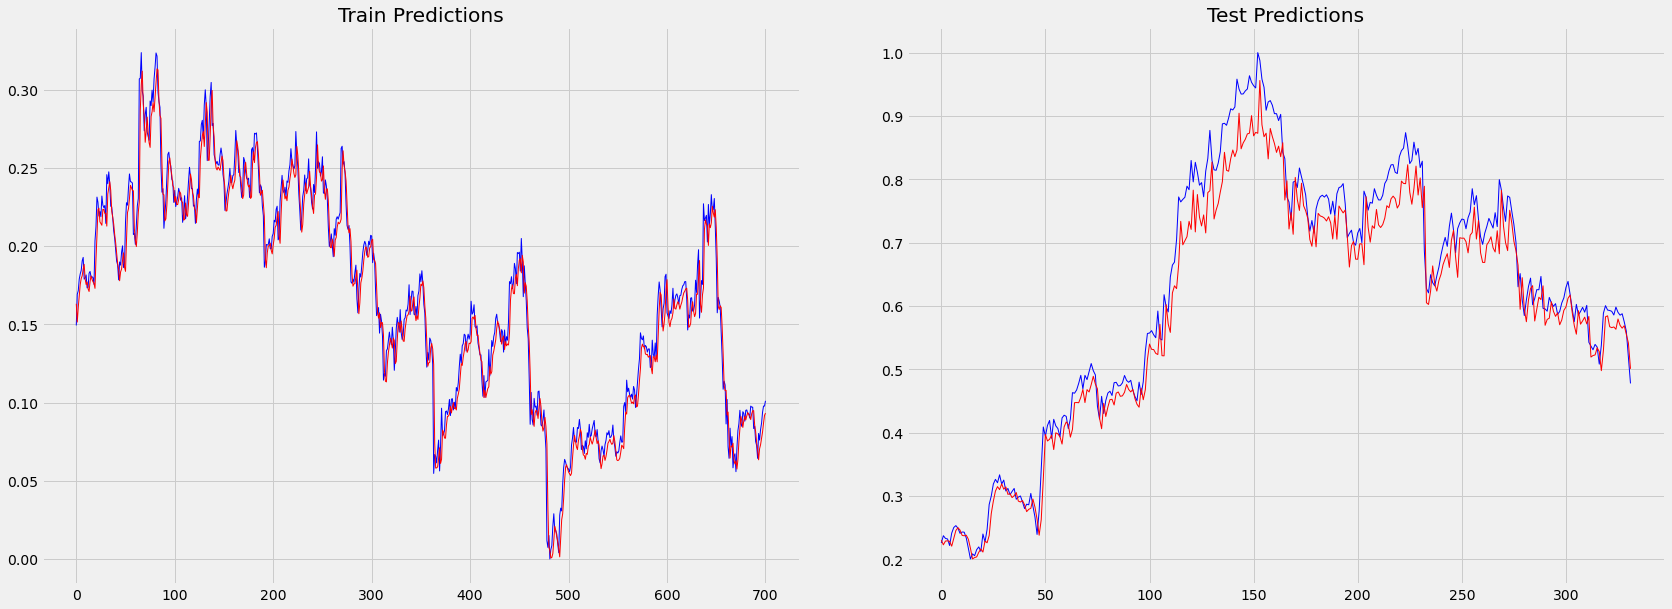

In [34]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(25, 10), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for train predictions
axes[0][0].plot(y_train,color='b',linewidth=1)
axes[0][0].plot(train_predict,color='r',linewidth=1)
axes[0][0].set_title('Train Predictions')

# Graph for test predictions
axes[0][1].plot(ytest,color='b',linewidth=1)
axes[0][1].plot(test_predict,color='r',linewidth=1)
axes[0][1].set_title('Test Predictions')

In [35]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics for train
math.sqrt(mean_squared_error(y_train,train_predict))

140.18209466877644

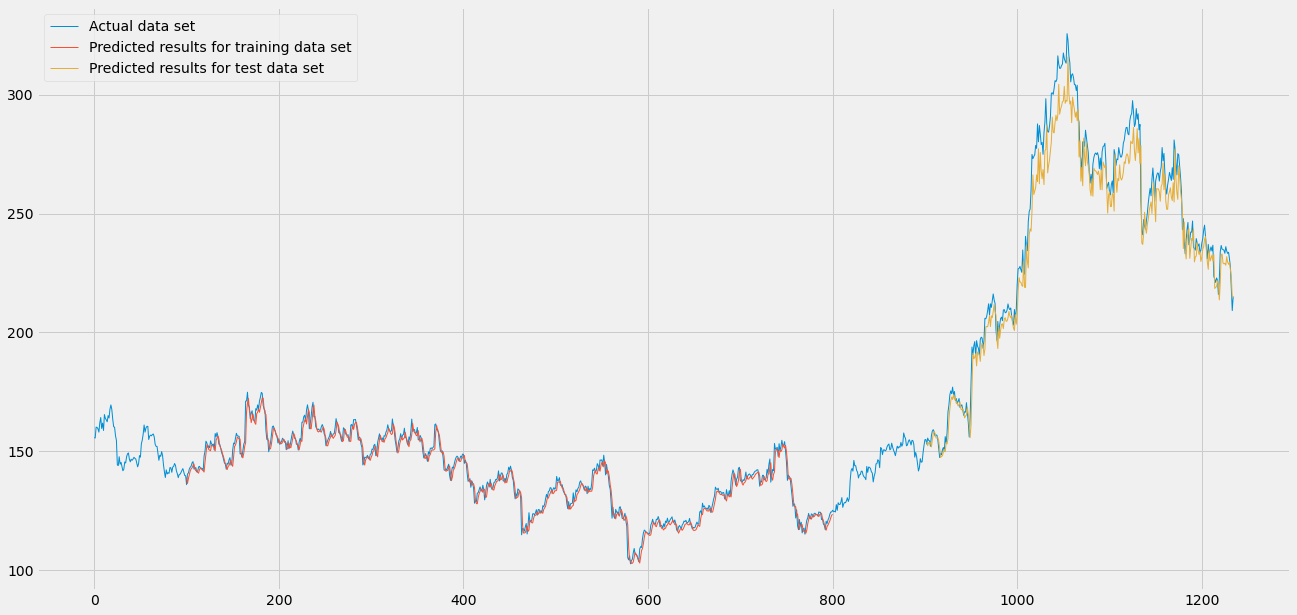

In [37]:
# Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# Plot baseline and predictions
plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(df),linewidth=1) #Actual Data
plt.plot(trainPredictPlot,linewidth=1) #Train data
plt.plot(testPredictPlot,linewidth=1)  #Test data
plt.legend(['Actual data set', 'Predicted results for training data set', 'Predicted results for test data set'], loc='upper left')
plt.show()

In [38]:
#Taking the last 100 days values as input to predic future values
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# CNN

In [42]:
import datetime as dt
from datetime import datetime    
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = pd.read_csv('Downloads/Mini project/NSE-Tata-Global-Beverages-Limited.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [44]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [45]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

C:\Users\srika\AppData\Local\Temp/ipykernel_9764/2985681012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [46]:
df1=data

In [47]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df1) - window_size -1 , 1):
    first = df1.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df1.iloc[i + j, 2] - first) / first)
    temp2.append((df1.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)

test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)
print(len(train_X))
print(len(test_X))

736
397


In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.metrics import RootMeanSquaredError

model1 = tf.keras.Sequential()

model1.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model1.add(TimeDistributed(MaxPooling1D(2)))
model1.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model1.add(TimeDistributed(MaxPooling1D(2)))
model1.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model1.add(TimeDistributed(MaxPooling1D(2)))
model1.add(TimeDistributed(Flatten()))



model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model1.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=40, verbose=1, shuffle =True)

Epoch 1/100
19/19 [==============================] - 8s 203ms/step - loss: 0.0122 - mse: 0.0122 - mae: 0.0843 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0586
Epoch 2/100
19/19 [==============================] - 3s 156ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0582 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0500
Epoch 3/100
19/19 [==============================] - 1s 70ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0531 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0504
Epoch 4/100
19/19 [==============================] - 1s 72ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0509 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0423
Epoch 5/100
19/19 [==============================] - 2s 82ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0472 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0452
Epoch 6/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0455 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0389
Epoch 7/100
19

In [49]:
model1.evaluate(test_X, test_Y)

13/13 [==============================] - 1s 5ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0264


[0.0011442354880273342, 0.0011442354880273342, 0.026389671489596367]

13/13 [==============================] - 3s 4ms/step


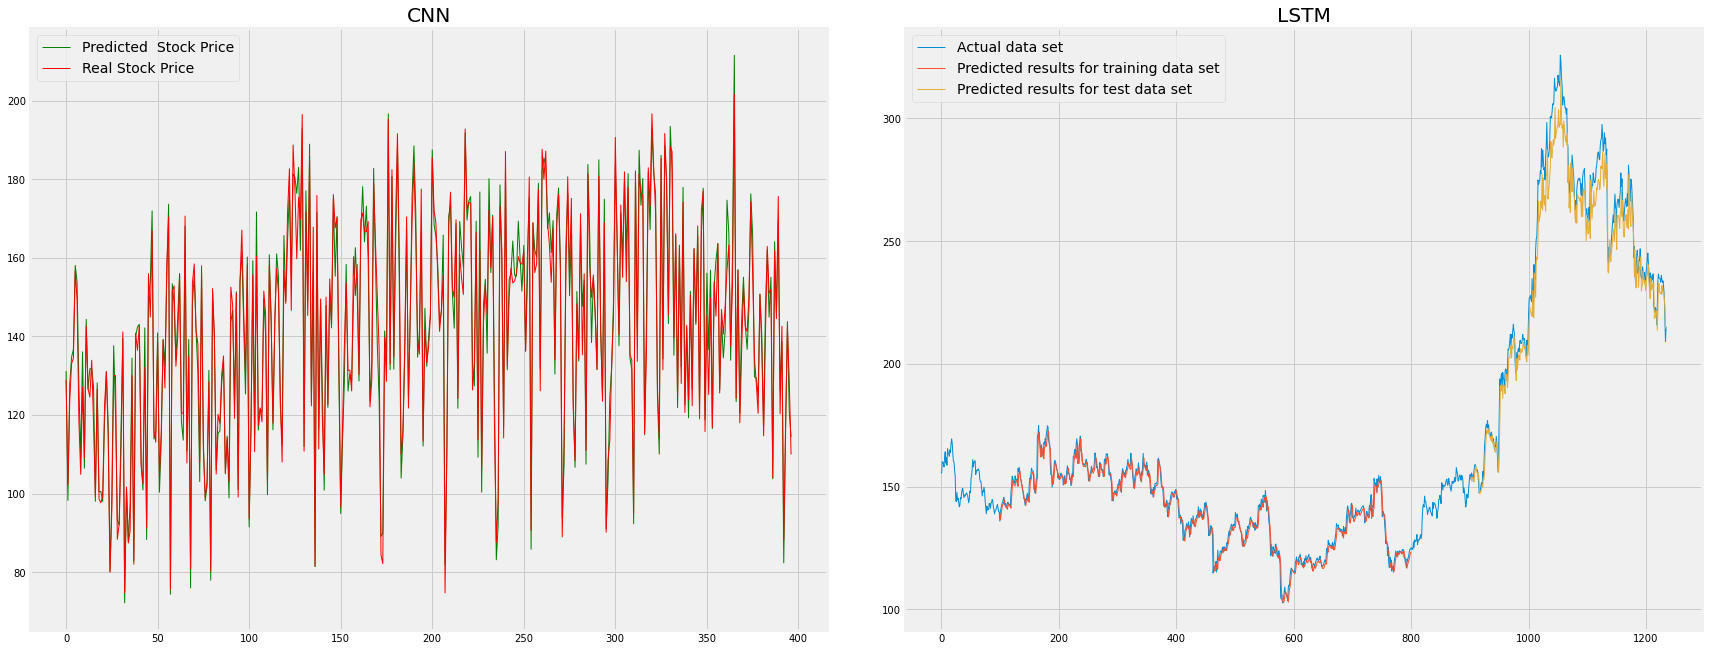

In [50]:
predicted  = model1.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
fig1, axes1 = plt.subplots(nrows=1,ncols=2, figsize=(25, 10), squeeze=False)
fig1.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

axes1[0][0].plot(predicted, color = 'green', label = 'Predicted  Stock Price',linewidth=1)
axes1[0][0].plot(test_label, color = 'red', label = 'Real Stock Price',linewidth=1)
axes1[0, 0].set_title("CNN")
axes1[0][0].legend()

look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

axes1[0][1].plot(scaler.inverse_transform(df),linewidth=1)
axes1[0][1].plot(trainPredictPlot,linewidth=1)
axes1[0][1].plot(testPredictPlot,linewidth=1)
axes1[0, 1].set_title("LSTM")
axes1[0][1].legend(['Actual data set', 'Predicted results for training data set', 'Predicted results for test data set'], loc='upper left')

In [51]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=1
while(i<=30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input: \n\n{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("\n{} day output: {}\n\n\n".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.5009415]
101
2 day input: 

[0.62057373 0.64926042 0.63671    0.63155536 0.64769162 0.66136262
 0.68063649 0.69565217 0.7082026  0.69408337 0.72545944 0.74652622
 0.71985657 0.68399821 0.72209771 0.7310623  0.7371134  0.73644106
 0.7218736  0.73935455 0.74831914 0.78507396 0.75974899 0.77409234
 0.73688929 0.70909906 0.69722098 0.71470193 0.72545944 0.73823398
 0.73038996 0.72299417 0.74719857 0.72523532 0.7994173  0.78283281
 0.75571493 0.73352757 0.77364411 0.77140296 0.7492156  0.72859704
 0.70035858 0.63021067 0.65105334 0.60959211 0.58471537 0.609368
 0.63043478 0.64388167 0.6017481  0.61160914 0.62572837 0.62550426
 0.64657104 0.59614523 0.59524877 0.59166293 0.61340206 0.6048857
 0.59928283 0.60354101 0.58673241 0.5912147  0.60466159 0.61272972
 0.62909009 0.63872703 0.61810847 0.59524877 0.57530255 0.60242044
 0.58583595 0.5912147  0.59771403 0.59009413 0.60085164 0.5425818
 0.53675482 0.53070372 0.53922008 0.5349619  0.50806813 0.53787539
 0.58852532 0.60040341 0.59345585 0

In [52]:
print("The output for the upcoming 30 days is :")
print(scaler.inverse_transform(lst_output))

The output for the upcoming 30 days is :
[[214.41005199]
 [214.33623592]
 [213.39815618]
 [211.76406979]
 [209.7950784 ]
 [207.83866672]
 [206.12134277]
 [204.72614464]
 [203.62706848]
 [202.74217328]
 [201.98020955]
 [201.2693825 ]
 [200.56792375]
 [199.86127221]
 [199.15257945]
 [198.45213133]
 [197.76944907]
 [197.10912705]
 [196.47024108]
 [195.84787762]
 [195.23522155]
 [194.62571706]
 [194.0142179 ]
 [193.39761903]
 [192.77451755]
 [192.14487354]
 [191.50945829]
 [190.86930238]
 [190.22559596]
 [189.57936296]]


In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df)

1235

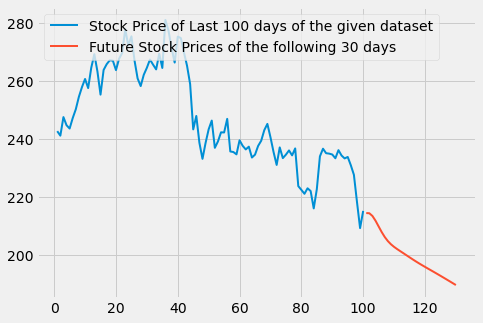

In [54]:
plt.figure(figsize=(7, 5))
plt.plot(day_new,scaler.inverse_transform(df[1135:]),linewidth=2)
plt.plot(day_pred,scaler.inverse_transform(lst_output),linewidth=2)
plt.legend(['Stock Price of Last 100 days of the given dataset', 'Future Stock Prices of the following 30 days'], loc='upper left')